In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dtm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [2]:
iris = load_iris()
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

x = data1.iloc[:,:3]
y = data1.target

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=0)

In [3]:
import src.sk_ml; reload(src.sk_ml)
from src.sk_ml import *

In [4]:
models = sk_models(stoplist=())
params = cv_default_params()

In [4]:
df_cv_res = grid_cv_models(train_x, train_y, models, params, path='data/cross_validation/', redo=True)

2017-05-27 08:45:14.412000 CVing: kind = reg, model = DTreg
2017-05-27 08:45:18.572000 CVing: kind = reg, model = linearSVR
2017-05-27 08:45:22.991000 CVing: kind = reg, model = ADAreg
2017-05-27 08:45:32.756000 CVing: kind = reg, model = MLPreg
2017-05-27 08:45:38.444000 CVing: kind = reg, model = BAGreg
2017-05-27 08:45:49.787000 CVing: kind = reg, model = SVR
2017-05-27 08:45:58.716000 CVing: kind = reg, model = lasso
2017-05-27 08:46:02.672000 CVing: kind = reg, model = ridge
2017-05-27 08:46:07.152000 CVing: kind = reg, model = RFreg
2017-05-27 08:46:30.649000 CVing: kind = reg, model = ols
2017-05-27 08:46:34.705000 CVing: kind = reg, model = GDBreg


D:\Program Files\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:593: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,


2017-05-27 08:46:39.960000 CVing: kind = cls, model = logistics
2017-05-27 08:46:44.128000 CVing: kind = cls, model = DTcls
2017-05-27 08:46:48.364000 CVing: kind = cls, model = SVM
2017-05-27 08:46:52.599000 CVing: kind = cls, model = linearSVM
2017-05-27 08:46:56.496000 CVing: kind = cls, model = MLPcls
2017-05-27 08:47:05.880000 CVing: kind = cls, model = ADAcls
2017-05-27 08:47:24.176000 CVing: kind = cls, model = GDBcls
2017-05-27 08:47:36 CVing: kind = cls, model = GNBcls
2017-05-27 08:47:39.653000 CVing: kind = cls, model = RFcls
2017-05-27 08:48:04.191000 CVing: kind = cls, model = BAGcls
finished CV 2017-05-27 08:48:17.002000 0:03:02.590000


In [6]:
loaded_df_cv_res = grid_cv_models(train_x, train_y, models, params, path='data/cross_validation/', save_res=True)

loaded existing result for model: DTreg
loaded existing result for model: linearSVR
loaded existing result for model: ADAreg
loaded existing result for model: MLPreg
loaded existing result for model: BAGreg
loaded existing result for model: SVR
loaded existing result for model: lasso
loaded existing result for model: ridge
loaded existing result for model: RFreg
loaded existing result for model: ols
loaded existing result for model: GDBreg
loaded existing result for model: logistics
loaded existing result for model: DTcls
loaded existing result for model: SVM
loaded existing result for model: linearSVM
loaded existing result for model: MLPcls
loaded existing result for model: ADAcls
loaded existing result for model: GDBcls
loaded existing result for model: GNBcls
loaded existing result for model: RFcls
loaded existing result for model: BAGcls
finished CV 2017-05-27 09:25:40.116000 0:00:00.070000


# prediction of some models such as MLPreg and LinearSVR is random

In [7]:
df_evl1 = evaluate_grid_cv(df_cv_res, train_x, train_y, test_x, test_y, evaluator_scalable_cls, path='data/cross_validation/', )
df_evl2 = evaluate_grid_cv(df_cv_res, train_x, train_y, test_x, test_y, evaluator_scalable_cls)

D:\Program Files\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# loaded parameters of sklearn model works

In [7]:
df_evl_loaded = evaluate_grid_cv(loaded_df_cv_res, train_x, train_y, test_x, test_y, evaluator_scalable_cls)

D:\Program Files\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [8]:
df_evl_loaded

test_acc   test_f1  test_mse  train_acc  train_f1  train_mse
reg BAGreg     1.000000  1.000000  0.014087   1.000000  1.000000   0.008998
cls GDBcls     1.000000  1.000000  0.000000   0.975000  0.974884   0.025000
reg SVR        1.000000  1.000000  0.045988   0.975000  0.974884   0.033624
    RFreg      1.000000  1.000000  0.010920   1.000000  1.000000   0.008517
cls ADAcls     0.966667  0.967282  0.033333   0.950000  0.949658   0.050000
    RFcls      0.966667  0.967282  0.033333   1.000000  1.000000   0.000000
reg GDBreg     0.966667  0.967282  0.026397   1.000000  1.000000   0.001134
    DTreg      0.966667  0.967282  0.022759   0.950000  0.949390   0.032281
    ols        0.966667  0.965769  0.070981   0.975000  0.974884   0.057479
    linearSVR  0.966667  0.965769  0.071488   0.975000  0.974884   0.057630
    ridge      0.966667  0.965769  0.071311   0.966667  0.966439   0.057639
cls logistics  0.966667  0.965769  0.033333   0.966667  0.966574   0.033333
    SVM        0.966667  0.965769  0.033333   0.958333  0.958282   0.041667
    MLPcls     0.966667  0.965769  0.033333   0.966667  0.966667   0.033333
    BAGcls     0.933333  0.933333  0.066667   1.000000  1.000000   0.000000
    DTcls      0.933333  0.933333  0.066667   1.000000  1.000000   0.000000
reg ADAreg     0.933333  0.933333  0.027548   0.950000  0.949658   0.031083
cls GNBcls     0.866667  0.866667  0.133333   0.900000  0.900153   0.100000
    linearSVM  0.700000  0.684874  0.300000   0.900000  0.896323   0.100000
reg MLPreg     0.366667  0.336825  0.296361   0.533333  0.480135   0.218478
    lasso      0.433333  0.262016  0.320893   0.308333  0.145329   0.379992

In [14]:
a= (df_evl1.sort_index()/df_evl2.sort_index()).mean(axis=1)
a = a.to_frame()
b=(df_evl_loaded.sort_index()/df_evl1.sort_index()).mean(axis=1)
a[1] = b
a.columns = ['two prediction', 'load/train']

In [17]:
a.sort_values('two prediction')

two prediction  load/train
cls RFcls            0.828571    1.000000
    BAGcls           0.914418    1.186084
    DTcls            0.948771    0.999082
reg BAGreg           0.966015    1.040742
    GDBreg           0.968744    1.048633
    linearSVR        0.999144    1.000669
cls ADAcls           1.000000    1.000000
reg lasso            1.000000    1.000000
    SVR              1.000000    1.000000
    DTreg            1.000000    1.000000
    ridge            1.000000    1.000000
cls logistics        1.000000    1.000000
    SVM              1.000000    1.000000
    GNBcls           1.000000    1.000000
    GDBcls           1.000000    1.000000
reg ols              1.000000    1.000000
    MLPreg           1.004002    0.992762
    ADAreg           1.030979    0.965157
cls MLPcls           1.052712    0.961202
reg RFreg            1.065469    1.047352
cls linearSVM        1.497352    1.135433

# Vis result

In [10]:
%matplotlib inline

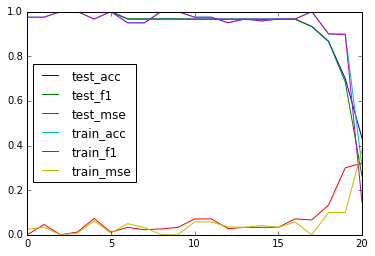

In [12]:
vis_evaluation('data/cross_validation/', 5)

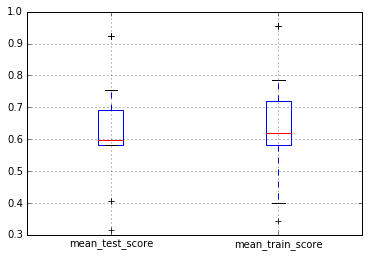

In [11]:
vis_grid_cv_one_model('data/cross_validation/cv_5_model_ADAcls.csv')